# Demo 1: Query and Visualization
This demo reads near-surface temperature for a specified time and geographic range, and visualizes it as a contour map.

In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
from dx_interface import DXInterface

Initialize the data interface to a well-known socket.

In [2]:
client = DXInterface('20.84.58.28:8000')

Query the 'tas' (near-surface temperature) variable using the ACCESS-ESM1-5 simulation model for November 28 and 29, 1982 within the bound of the lat/lon pairs (38.9N, 77.0W) and (40.7N, 74.0W). GDDP data projected on a WGS84 grid with .25 degree resolution. The bounds will round to the nearest grid points. In addition to model, the user an specify different scenarios for carbon emission to guide future projections.

In [26]:
data, lat, lon = client.query(source = 'planetary-gddp',
		variable = 'tas',
		model = 'ACCESS-CM2',
		start_date = '1982-10-28',
		end_date = '1982-11-29',
		scenario='historical',
		quality=-2,
		lb=(900,300),
		ub=(1200,500),
		geo_lb = (38.9, -77.0),
		geo_ub = (40.7,-74.0))

v:tas,m:ACCESS-CM2,s:historical,q:-2,t:723731_723763,l:900_300,u:1200_500


In [27]:
np.nansum(data)

2456939.5

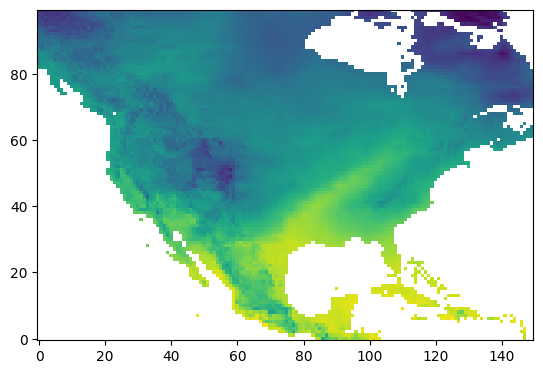

In [29]:
plt.imshow(data[:,:],origin='lower')

Plot the temperature across the selected range, using a countoured heat map. 

In [ ]:
fig = plt.figure(num=None, figsize=(7, 7) ) 
m = Basemap(projection='cyl', llcrnrlon=-77.0, llcrnrlat=38.9, urcrnrlon=-74.0, urcrnrlat=40.7, resolution='i')
x, y = m(*np.meshgrid(lon,lat))
cs = m.contourf(x, y, data[0], levels = 100, cmap=plt.cm.jet)
m.drawcoastlines()
m.drawmapboundary()
m.drawcountries(linewidth=1, linestyle='solid', color='k' ) 
m.drawmeridians(range(33, 48, 2), color='k', linewidth=1.0, dashes=[4, 4], labels=[0, 0, 0, 1])
m.drawparallels(range(3, 15, 2), color='k', linewidth=1.0, dashes=[4, 4], labels=[1, 0, 0, 0])
plt.ylabel("Latitude", fontsize=15, labelpad=35)
plt.xlabel("Longitude", fontsize=15, labelpad=20)
cbar = m.colorbar(cs, location='right', pad="3%")
cbar.set_label('Temperature (K)', fontsize=13)
plt.title('near-surface air temperature', fontsize=15)
plt.show()